# Week3 Clustering

## Load Data

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
#경고 메세지는 무시
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Mall Customers Data
mall = pd.read_csv("mall_customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing/EDA

In [17]:
# 결측치 확인
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
# drop Customer ID 
# 고유변수인 ID drop하기
mall = mall.drop('CustomerID', axis = 1)

In [19]:
# Gender Male일때 0, Female 일때 1로 바꾸기
mall['Gender'] = mall['Gender'].replace('Female', 1)
mall['Gender'] = mall['Gender'].replace('Male', 0)
mall.head() #잘 변환되었는지 확인하기

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


<AxesSubplot:xlabel='Gender', ylabel='count'>

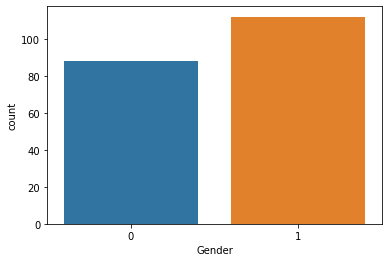

In [21]:
# Gender 별 분포 살펴보기
sns.countplot(x = 'Gender', data = mall)
#여성 소비자(1)가 더 많다는 것을 확인할 수 있었다

<AxesSubplot:>

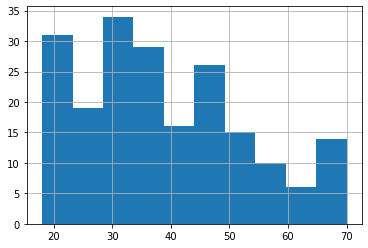

In [23]:
# 나이대별 소비자들 분포 확인하기
cust_age = mall.Age
cust_age.hist()
#나이 스펙트럼이 10대 후반에서부터 70까지 넓다는 것을 확인할 수 있다
# 대체적으로 20-50대에 대부분의 소비자들이 분포되어 있다는 것을 확인할 수 있다

In [35]:
columns = mall.columns
columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:>

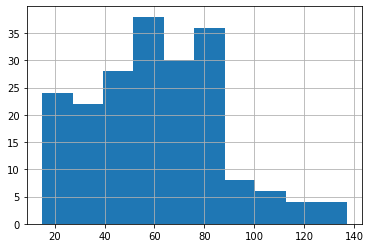

In [28]:
# 소득 분포 살펴보기
income = mall['Annual Income (k$)']
income.hist()
# 소비자들의 소득 분포를 살펴보았을 때 $60-80 의 소득을 가진 사람들이 가장 많은 것을 확인할 수 있다

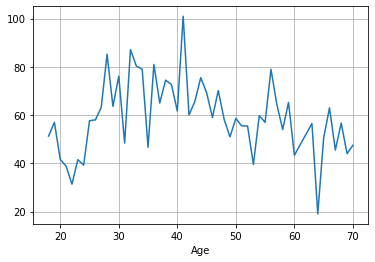

In [25]:
# 나이대별 소득 살펴보기
age_income = mall.groupby('Age').mean()['Annual Income (k$)']
age_income.plot()
plt.grid()
# 30-40대의 소비자들의 수입이 가장 높은 것을 확인할 수 있고, 이는 대부분의 소비자들의 나이대와 일치하다는 것을 확인할 수 있다

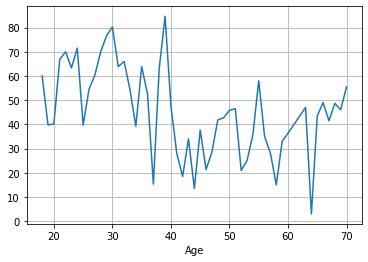

In [26]:
# 나이대별 소비 살펴보기
age_income = mall.groupby('Age').mean()['Spending Score (1-100)']
age_income.plot()
plt.grid()
# 높은 소득과 대부분의 소비자들이 분포되어있는 30-40대에서 가장 높은 Spending Score를 보이는 것을 확인할 수 있다 

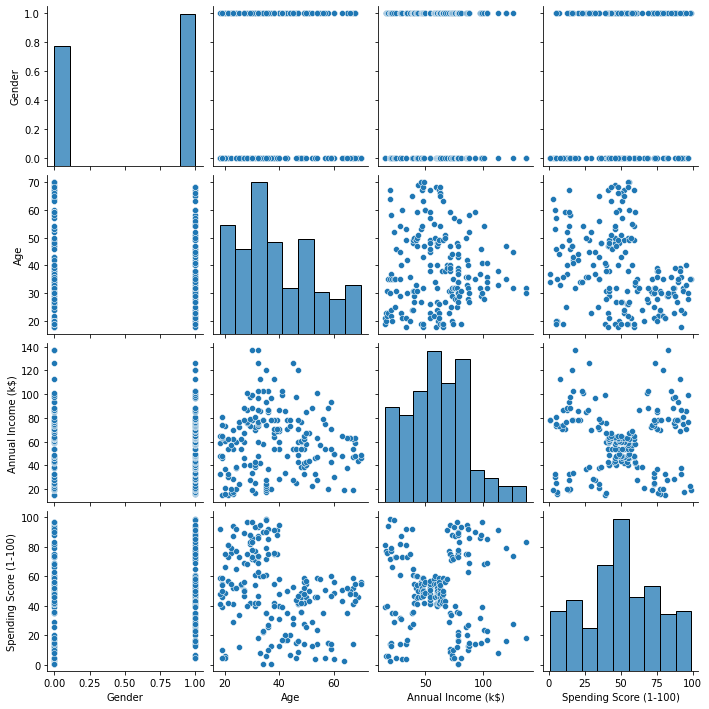

In [33]:
sns.pairplot(mall)
plt.show()
# pairplot의 결과 Annual Income 과 Spending Score 변수의 관계에서 cluster별로 모여서 분포되어 있는 것을 확인할 수 있다

<AxesSubplot:>

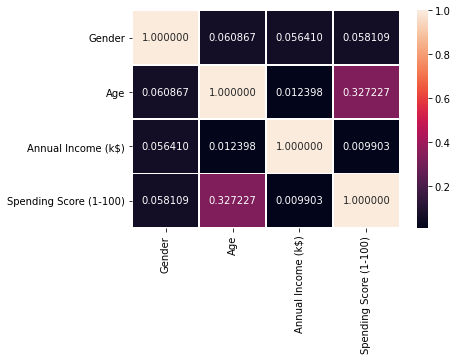

In [32]:
## 상관관계 살펴보기

sns.heatmap(data=mall.corr().abs(), annot = True, fmt = '1f', linewidths = .5)
# 0.7 이상의 높은 상관관계를 보이는 변수는 없는 것을 확인할 수 있다
# Age는 해당 소비자의 Spending Score와 어느 정도의 상관관계를 가지는 것을 유추할 수 있다

In [36]:
## Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(mall)
mall_scaled = scaler.transform(mall)
data = pd.DataFrame(mall_scaled)
data.columns = columns
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


# Clustering

## Hierarchical Clustering (계층적 군집화)

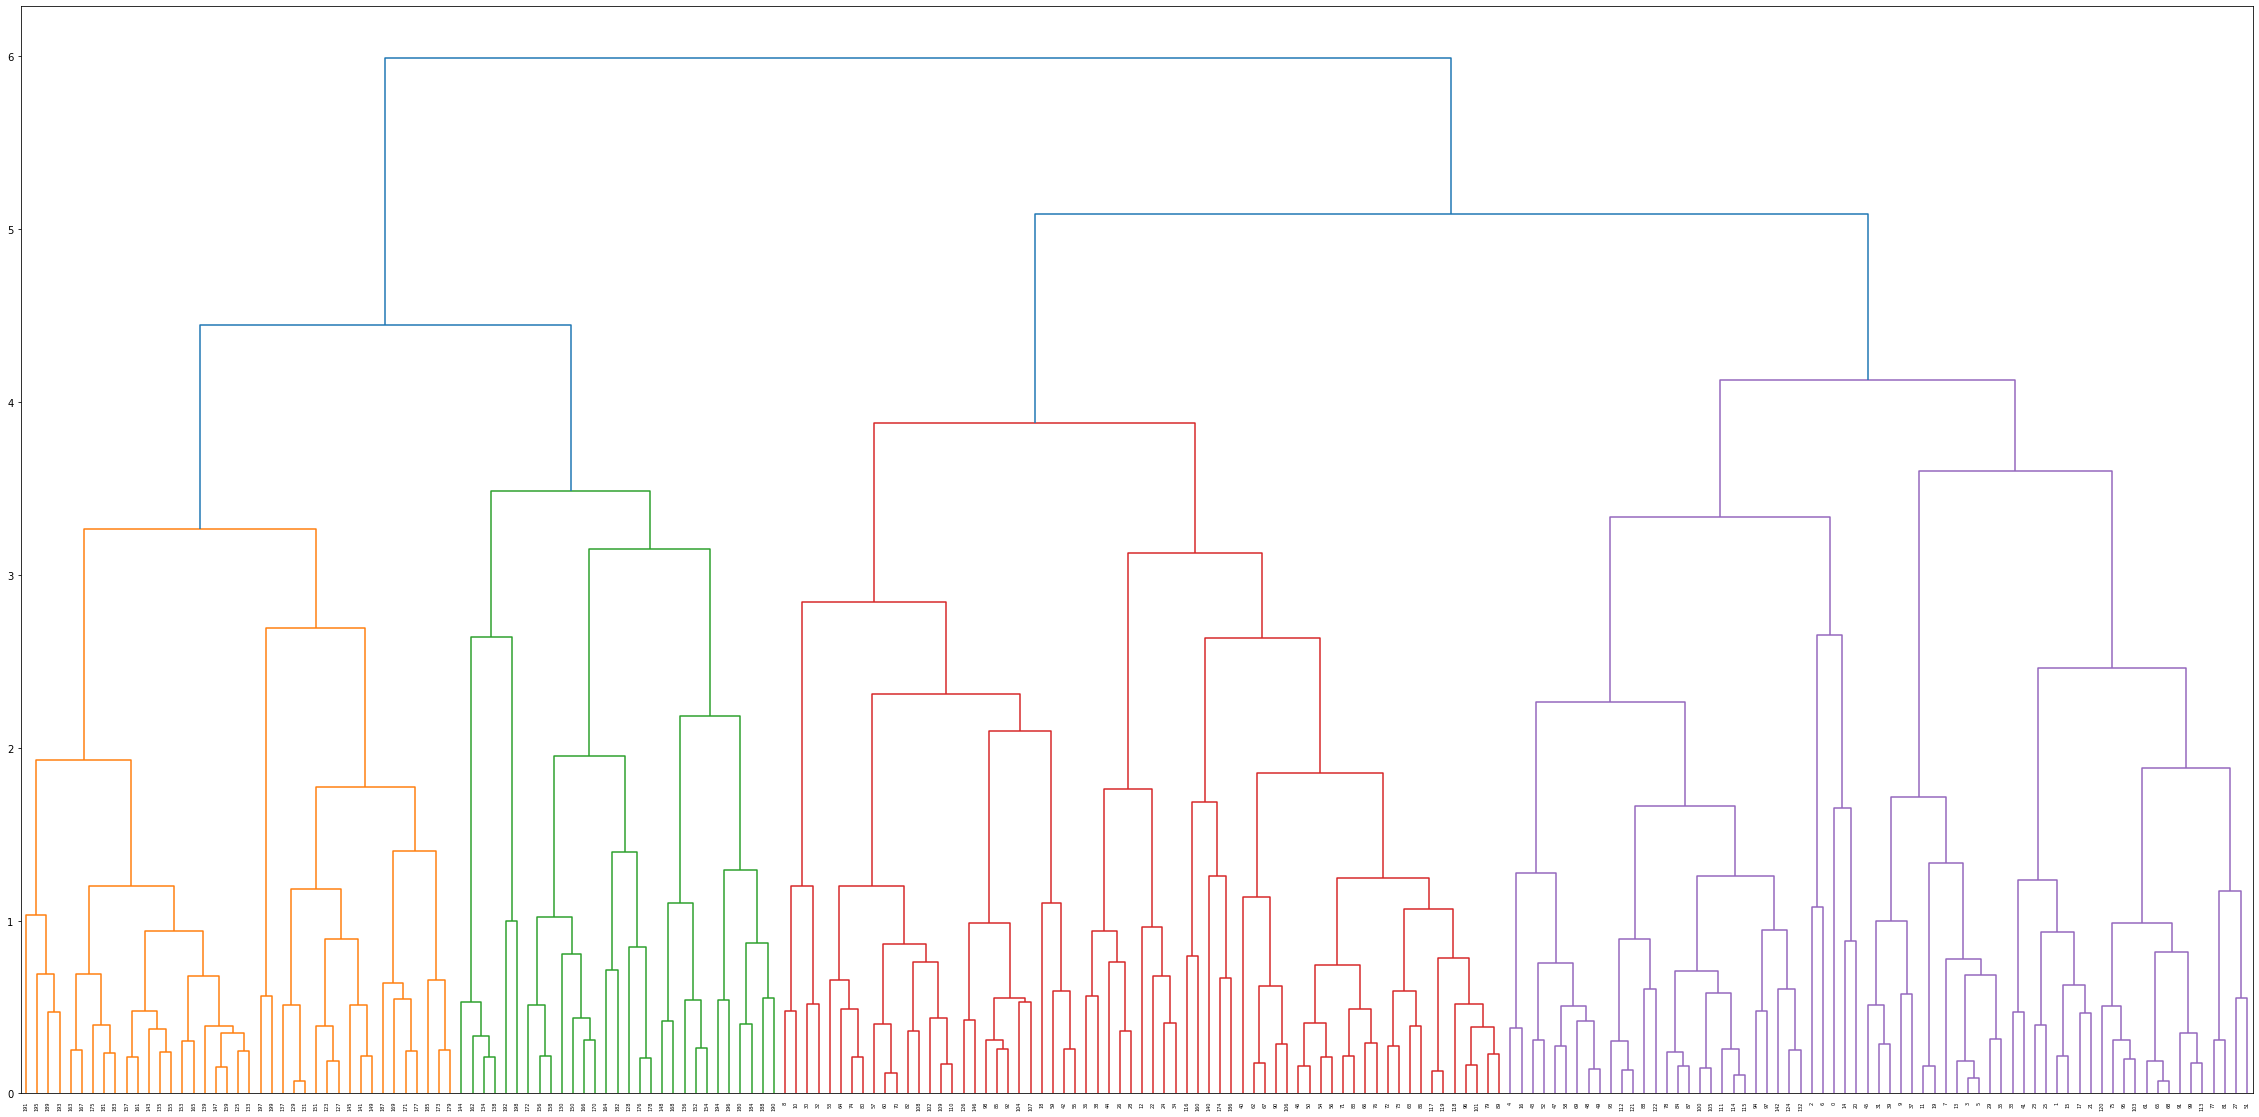

In [39]:
# Hierarchical Clusterin
from scipy.cluster.hierarchy import linkage, dendrogram, ward

# linkage 계산 -> mergings
# method: sinle, complete, average, weighted, centroid, median, ward
mergings = linkage(data, method = 'complete')

# dendrogram -> cluster 개수 정하기
plt.figure(figsize = (40,20))
dendrogram(mergings)
plt.show()



In [43]:
# 위의 dendrogram 에서 거리가 4인 지점을 기준으로 4개의 cluster를 생성하기로 결정
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
cluster = agg.fit_predict(data)

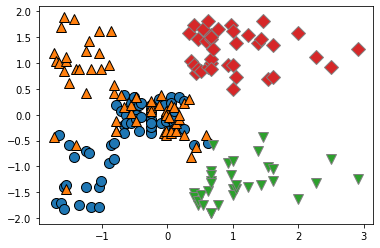

In [44]:
# Clustering 시각화 -> Annual Income 과 Spending Score 기준
import mglearn
mglearn.discrete_scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], cluster) 


In [45]:
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings, 4, criterion = 'distance'))
predict.columns = ['predict']
predict

,predict
0,4
1,5
2,4
3,5
4,4
...,...
195,1
196,2
197,1
198,2


array([[<AxesSubplot:title={'center':'predict'}>]], dtype=object)

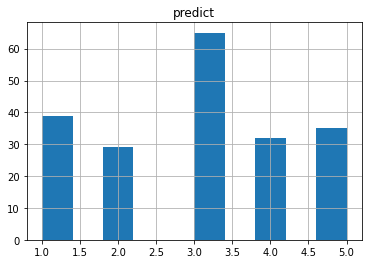

In [47]:
# 예측값 분포 살펴보기
predict.hist()

## K-Means Clustering (비계층적 군집화)
 - centroid 기반

In [73]:
columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [50]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [51]:
# Cluster 수(K값) 정하기 --> Elbow Method 이용
from sklearn.cluster import KMeans

distortions = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=100, n_init = 10, random_state = 0)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

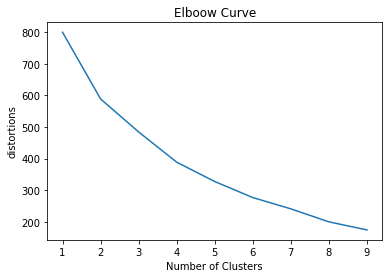

In [52]:
# Elbow Method 
# 군집 내 편차제곱합이 최소가 되도록 군집의 중심을 결정
# 편차제곱합이 급격하게 감소하기 시작하는 K 선택
# 그래프 그려 꺾이는 부분 확인 
plt.plot(range(1,10), distortions)
plt.xlabel("Number of Clusters")
plt.ylabel('distortions')
plt.title("Elboow Curve")
plt.show()

# Elbow Method -> 뚜렷하게 구분된 군집이 없는 데이터에서 elbow point 찾기 힘듦
# Number of Cluster = 4 일때 꺾이는 부분을 기준으로 clustering 하기로 결정

In [57]:
features = data[columns]
features

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


In [65]:
# Elbow Method으로 결정한 K 값을 기준으로 clustering 진행

km = KMeans(n_clusters = 4, algorithm = 'auto')
cluster_kmeans = km.fit(features)

predict = pd.DataFrame(km.predict(features))
predict.columns = ['predict']

kmeans_pred = pd.concat([features, predict], axis = 1)
kmeans_pred.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,-1.128152,-1.424569,-1.738999,-0.434801,0
1,-1.128152,-1.281035,-1.738999,1.195704,0
2,0.886405,-1.352802,-1.700830,-1.715913,1
3,0.886405,-1.137502,-1.700830,1.040418,3
4,0.886405,-0.563369,-1.662660,-0.395980,3


<AxesSubplot:>

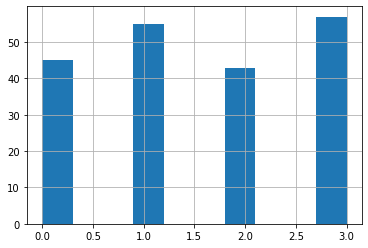

In [66]:
kmeans_pred['predict'].hist()

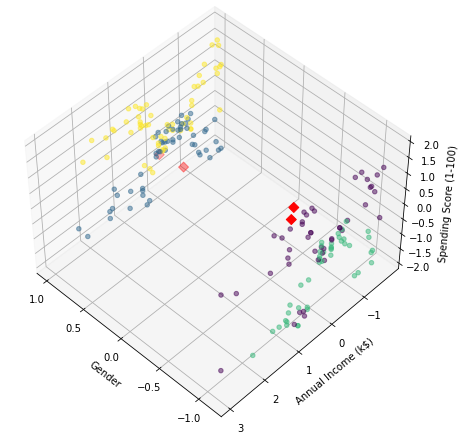

In [71]:
## Clustering 3D 시각화

centers = pd.DataFrame(km.cluster_centers_,columns=['Age','Gender','Annual Income (k$)','Spending Score (1-100)'])
center_x = centers['Gender']
center_y = centers['Annual Income (k$)']
center_z = centers['Spending Score (1-100)']

from mpl_toolkits.mplot3d import Axes3D

# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(kmeans_pred['Gender'],
    kmeans_pred['Annual Income (k$)'],
    kmeans_pred['Spending Score (1-100)'],
    c=kmeans_pred['predict'],
    alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## DBSCAN (비계층적 군집화)
 - density 기반

In [77]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [78]:
# eps: 한 데이터가 주변의 얼마만큼 떨어진 거리를 같은 군집으로 할 것인가
# eps 선택

from sklearn.neighbors import NearestNeighbors

neighbor = NearestNeighbors(n_neighbors = 5)
nbr = neighbor.fit(data)
distances, indices = nbr.kneighbors(data)

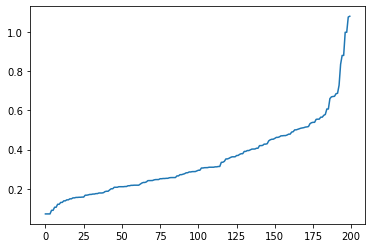

In [80]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)
# 그래프로 eps 값 선택하기 -> elbow method로 0.6부근에서 급격하게 꺾이는 것을 확인

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


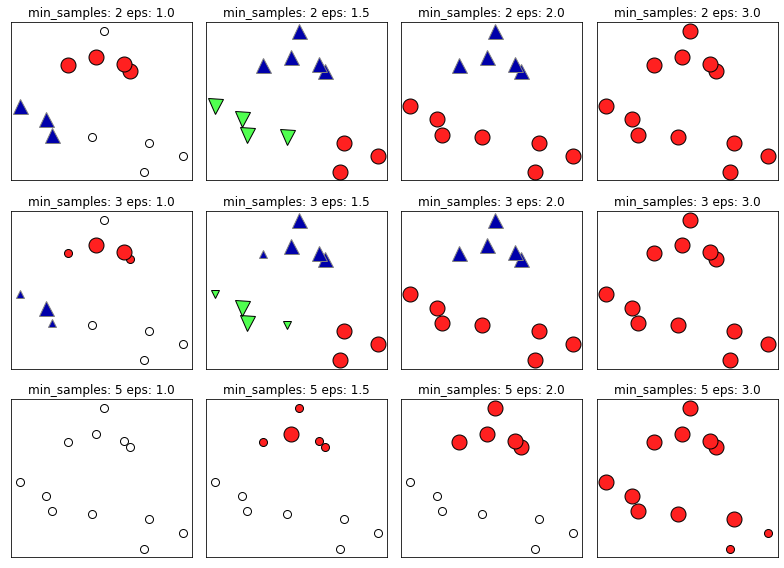

In [81]:
mglearn.plots.plot_dbscan()

In [83]:
#DBSCAN -> 동일한 군집에 속하는 데이터는 서로 근접하게 분포할 것이다라는 가정 기반으로 density based clustering 
from sklearn.cluster import DBSCAN

# eps 0.6, min samples 3으로 DBSCAN 
dbsc = DBSCAN(eps = 0.6, min_samples = 3)
predict = pd.DataFrame(dbsc.fit_predict(features))
predict.columns = ['predict']

predict

,predict
0,-1
1,0
2,-1
3,1
4,3
...,...
195,7
196,-1
197,-1
198,-1


Text(0, 0.5, 'Spending Score (1-100)')

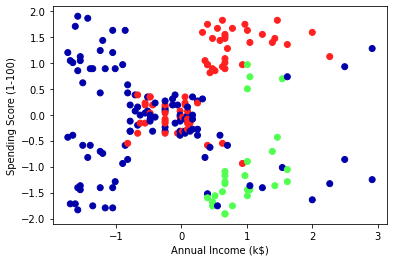

In [86]:
## 시각화

cluster_dbsc = dbsc.fit_predict(data)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c = cluster_dbsc, cmap = mglearn.cm3)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')